In [9]:
# Install necessary libraries (if not already installed)
!pip install seaborn scikit-learn matplotlib


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split


In [19]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:1000]        # first 1000 samples
y = mnist.target.astype(int)[:1000]

print("Dataset loaded with shape:", X.shape)


Dataset loaded with shape: (1000, 784)


First 5 data entries (pixel values + label):


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


Number of entries: 1000
Number of pixels per entry: 784


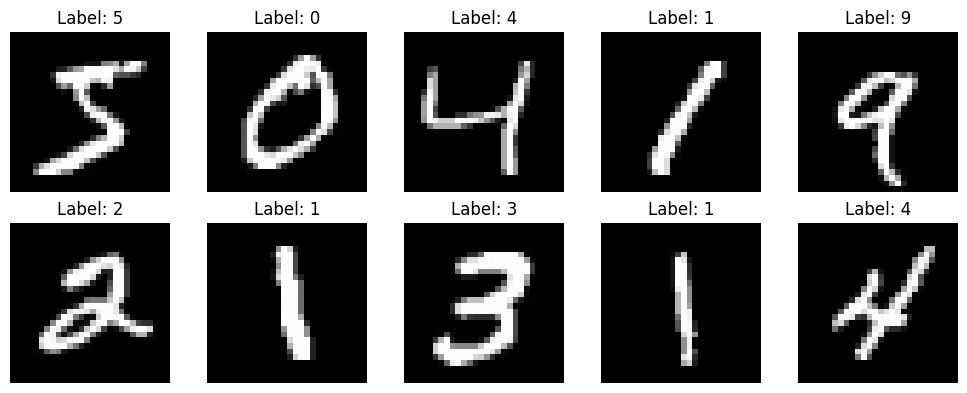

Dataset saved as 'mnist_1000_original.csv'


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame
df = pd.DataFrame(X)
df['Label'] = y

# View first 5 entries
print("First 5 data entries (pixel values + label):")
display(df.head())

# Dataset shape
print("Number of entries:", df.shape[0])
print("Number of pixels per entry:", df.shape[1]-1)

# Visualize first 10 digit images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Optional: Save dataset as CSV
df.to_csv("mnist_1000_original.csv", index=False)
print("Dataset saved as 'mnist_1000_original.csv'")


In [17]:
# Load MNIST dataset (70,000 samples)
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

# Take only first 1000 samples for this project
X = X[:1000]
y = y[:1000]

print("Shape of dataset:", X.shape)
print("Number of unique classes:", len(np.unique(y)))


Shape of dataset: (1000, 784)
Number of unique classes: 10


First 10 data entries:


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4



Number of data entries: 1000


/tmp/ipython-input-1864527449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='tab10')


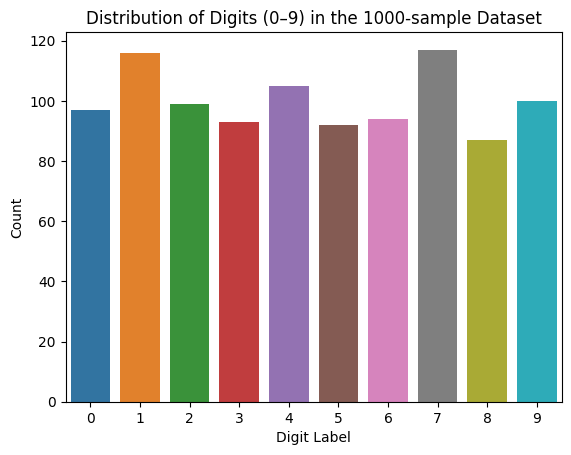

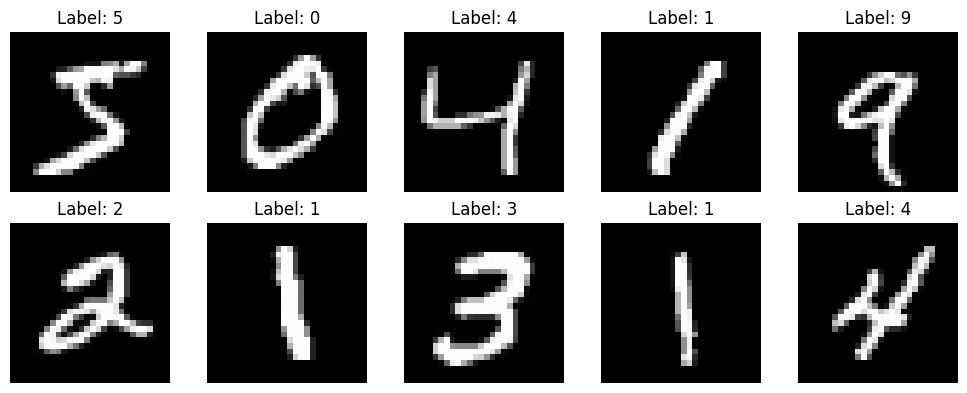


Dataset saved as 'mnist_1000_subset.csv'


In [18]:
# --- SEE THE DATASET (1000 ENTRIES) ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for easy viewing
df = pd.DataFrame(X)
df['Label'] = y

# 1️⃣ Show the first 10 data entries
print("First 10 data entries:")
display(df.head(10))

# 2️⃣ Show the total number of entries
print("\nNumber of data entries:", df.shape[0])

# 3️⃣ Check how many samples for each digit
sns.countplot(x=y, palette='tab10')
plt.title("Distribution of Digits (0–9) in the 1000-sample Dataset")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

# 4️⃣ Visualize a few digit images
plt.figure(figsize=(10, 4))
for i in range(10):        # show 10 images
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 5️⃣ (Optional) Save the dataset to a CSV file so you can open it in Excel
df.to_csv("mnist_1000_subset.csv", index=False)
print("\nDataset saved as 'mnist_1000_subset.csv'")


In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


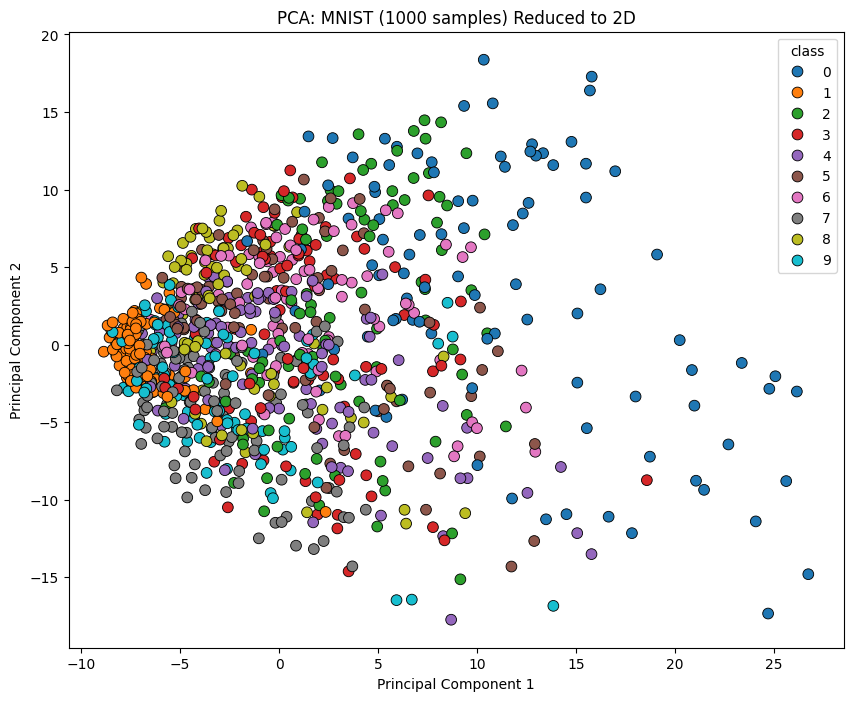

Explained variance ratio: [0.06494624 0.05482451]


In [13]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10', s=60, edgecolor='k')
plt.title("PCA: MNIST (1000 samples) Reduced to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


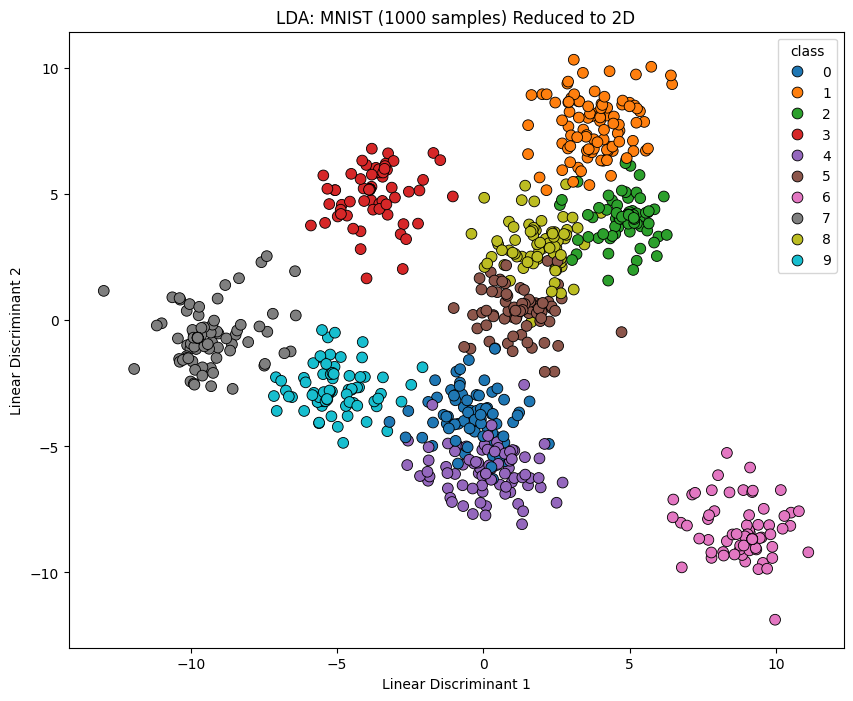

In [14]:
# Reduce using LDA (supervised)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Plot LDA results
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y_train, palette='tab10', s=60, edgecolor='k')
plt.title("LDA: MNIST (1000 samples) Reduced to 2D")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.show()


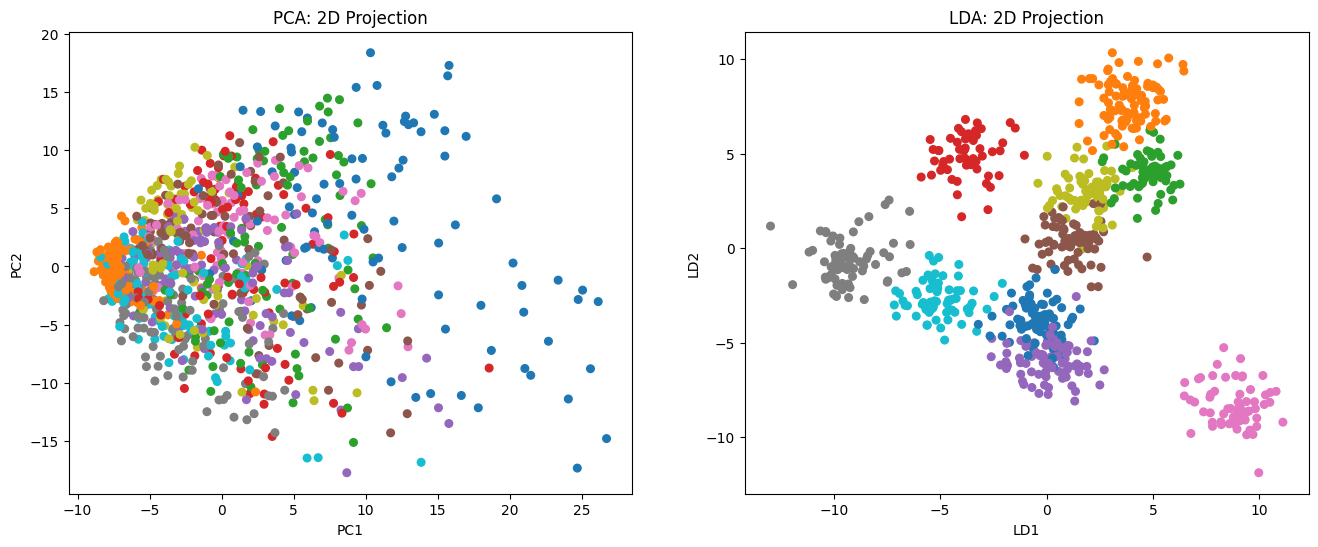

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=30)
axes[0].set_title('PCA: 2D Projection')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

axes[1].scatter(X_lda[:,0], X_lda[:,1], c=y_train, cmap='tab10', s=30)
axes[1].set_title('LDA: 2D Projection')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')

plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# PCA reduced data (50 components)
pca_50 = PCA(n_components=50)
X_train_pca50 = pca_50.fit_transform(X_train)
X_test_pca50 = pca_50.transform(X_test)

model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca50, y_train)
y_pred_pca = model_pca.predict(X_test_pca50)
print("Accuracy with PCA (50 components):", accuracy_score(y_test, y_pred_pca))

# LDA reduced data (9 components, since 10 classes → 9 max)
lda_9 = LDA(n_components=9)
X_train_lda9 = lda_9.fit_transform(X_train, y_train)
X_test_lda9 = lda_9.transform(X_test)

model_lda = LogisticRegression(max_iter=1000)
model_lda.fit(X_train_lda9, y_train)
y_pred_lda = model_lda.predict(X_test_lda9)
print("Accuracy with LDA (9 components):", accuracy_score(y_test, y_pred_lda))


Accuracy with PCA (50 components): 0.855
Accuracy with LDA (9 components): 0.56


In [21]:
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['Label'] = y
pca_df.to_csv("mnist_pca_1000.csv", index=False)

lda_df = pd.DataFrame(X_lda, columns=['LD1','LD2'])
lda_df['Label'] = y
lda_df.to_csv("mnist_lda_1000.csv", index=False)

print("PCA & LDA results saved as CSV files.")

PCA & LDA results saved as CSV files.
